# Laboratorio #2: Análisis de Datos con Python

### Kevin De Mata 19000243

## Parte 1: Numpy

In [173]:
import numpy as np

### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [174]:
x = np.full((1000), True)
print("El tamaño en bytes del arreglo es de", x.size * x.itemsize, "bytes")


El tamaño en bytes del arreglo es de 1000 bytes


### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [175]:
pares = np.arange(100,1,-2)
pares[pares.size-10:pares.size]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

### 3.

In [176]:
x = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]])
x[1]
x[0:3:2, 0:4:2]

array([[2, 5],
       [8, 5]])

### 4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b). 

In [177]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
c = a-b
np.mean(c)

-0.25

### 5.  Tengo valores de cordenadas (x, y) en las columnas del array [[1.33, 4.5],[30.0, 10.7],[70.2, 0.5]] Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array. 

In [178]:
coordenadas = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
coordenadas = np.append(coordenadas, [[37.1,-3.6]], axis=0)
coordenadas.shape

(4, 2)

### 6.  Copie el array del ejercicio anterior. Traspóngalo Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0). 

In [179]:
nuevasCoordenadas = coordenadas.transpose()
nuevosParesCoord = np.array([[10.8, 3.0], [35.8, 12.0]])
nuevasCoordenadas = np.hstack((nuevasCoordenadas, nuevosParesCoord))
nuevasCoordenadas


array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 ,  3.  ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 , 35.8 , 12.  ]])

## Parte 2: Exploración y Minería de Datos

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
dataSet = pd.read_csv("NucleosPoblacion.csv")
dataSet.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?

In [182]:
cont = 0
for i in dataSet.Poblacion:
    if i >= 100000:
        cont+=1

print("Existen", cont, "municipios con mas de 100,000 habitantes")

Existen 62 municipios con mas de 100,000 habitantes


### 2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda: 
a. ¿Cuál es la segunda ciudad más poblada? 

b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

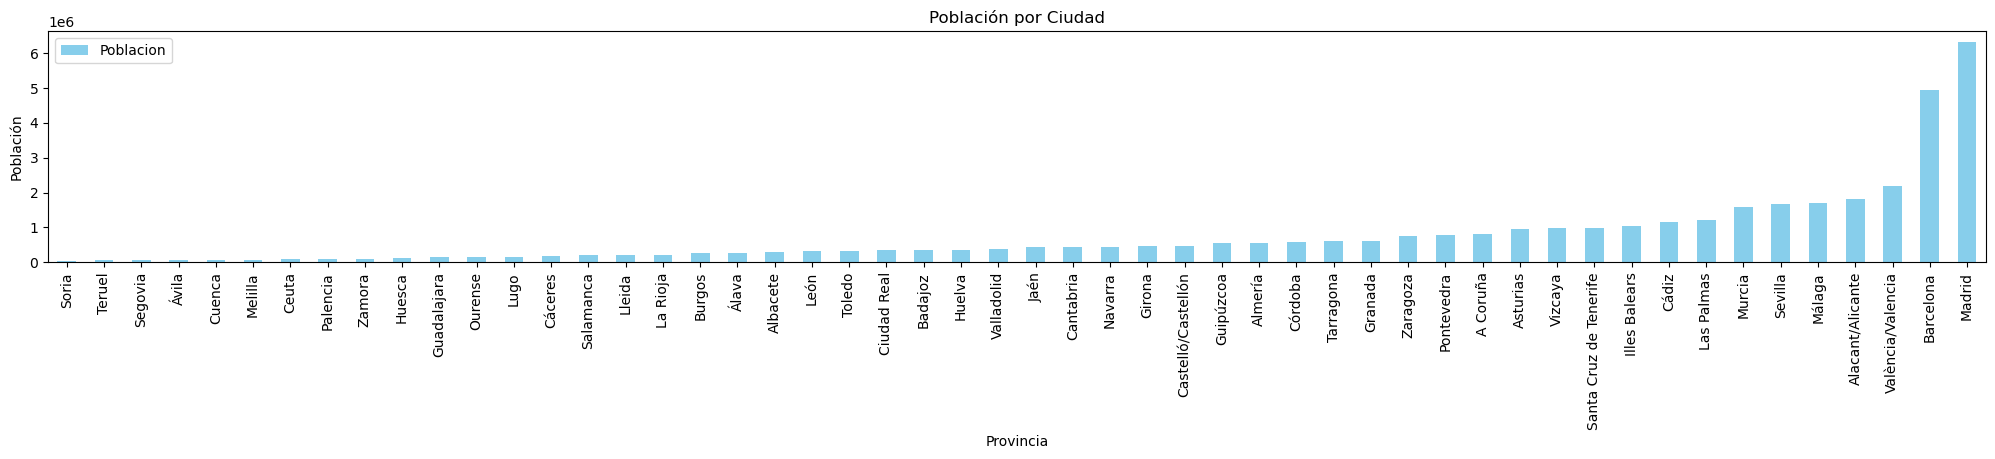

In [183]:
fig = plt.figure(figsize=(25,3))
ax = fig.add_subplot(111)

dataSetOrdenado = dataSet[['Provincia', 'Poblacion']]
dataSetOrdenado = dataSetOrdenado.groupby('Provincia').sum().reset_index()
dataSetOrdenado = dataSetOrdenado.sort_values(by='Poblacion')
dataSetOrdenado.plot(kind='bar', x='Provincia', y='Poblacion', color='skyblue',ax=ax)
plt.xlabel('Provincia')
plt.ylabel('Población')
plt.title('Población por Ciudad')
plt.show()

In [184]:
print("La segunda ciudad mas poblada es", dataSetOrdenado.iloc[-2].Provincia)


La segunda ciudad mas poblada es Barcelona


In [185]:
pos = 0
for i in range(1, dataSetOrdenado['Provincia'].size):
    if dataSetOrdenado.iloc[-i].Provincia == "Granada":
        pos = i
        break;
print("Granada ocupa el puesto numero",pos,"en la lista de ciudades mas pobladas")

Granada ocupa el puesto numero 17 en la lista de ciudades mas pobladas


### 3. ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?

In [186]:
cont = 0
dataSetNavarra = dataSet.loc[dataSet['Provincia'] == 'Navarra']

for i in dataSetNavarra.Poblacion:
    if i >= 5000:
        cont+=1

print("Existen", cont, "municipios de Navarra con mas de 5,000 habitantes")

Existen 11 municipios de Navarra con mas de 5,000 habitantes


### 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [187]:
mayor = 0
cont = 0
ubLista = 0
for y in dataSet['Y']:
    if y > mayor:
        mayor = y
        ubLista = cont
    cont += 1

print("El municipio ubicado mas al norte del pais es", dataSet.Municipio[ubLista], "que se encuentra en la provincia de", dataSet.Provincia[ubLista], "en Y =", dataSet.Y[ubLista])

El municipio ubicado mas al norte del pais es Viveiro que se encuentra en la provincia de Lugo en Y = 43.6255783851


### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [188]:
dataSetGranada = dataSet.loc[dataSet['Provincia'] == 'Granada']

print("Media", round(dataSetGranada['Poblacion'].mean(), 4))
print("Mediana", round(np.median(dataSetGranada['Poblacion']),4))
print("Desviacion", round(np.std(dataSetGranada['Poblacion']),4))
print("Mínimo", round(np.min(dataSetGranada['Poblacion']),4))
print("Máximo", round(np.max(dataSetGranada['Poblacion']),4))

Media 30217.85
Mediana 17526.0
Desviacion 49080.4622
Mínimo 10386.0
Máximo 239154.0


### 6.  Realice un histograma con la población de los Municipios para cada una de las provincias.

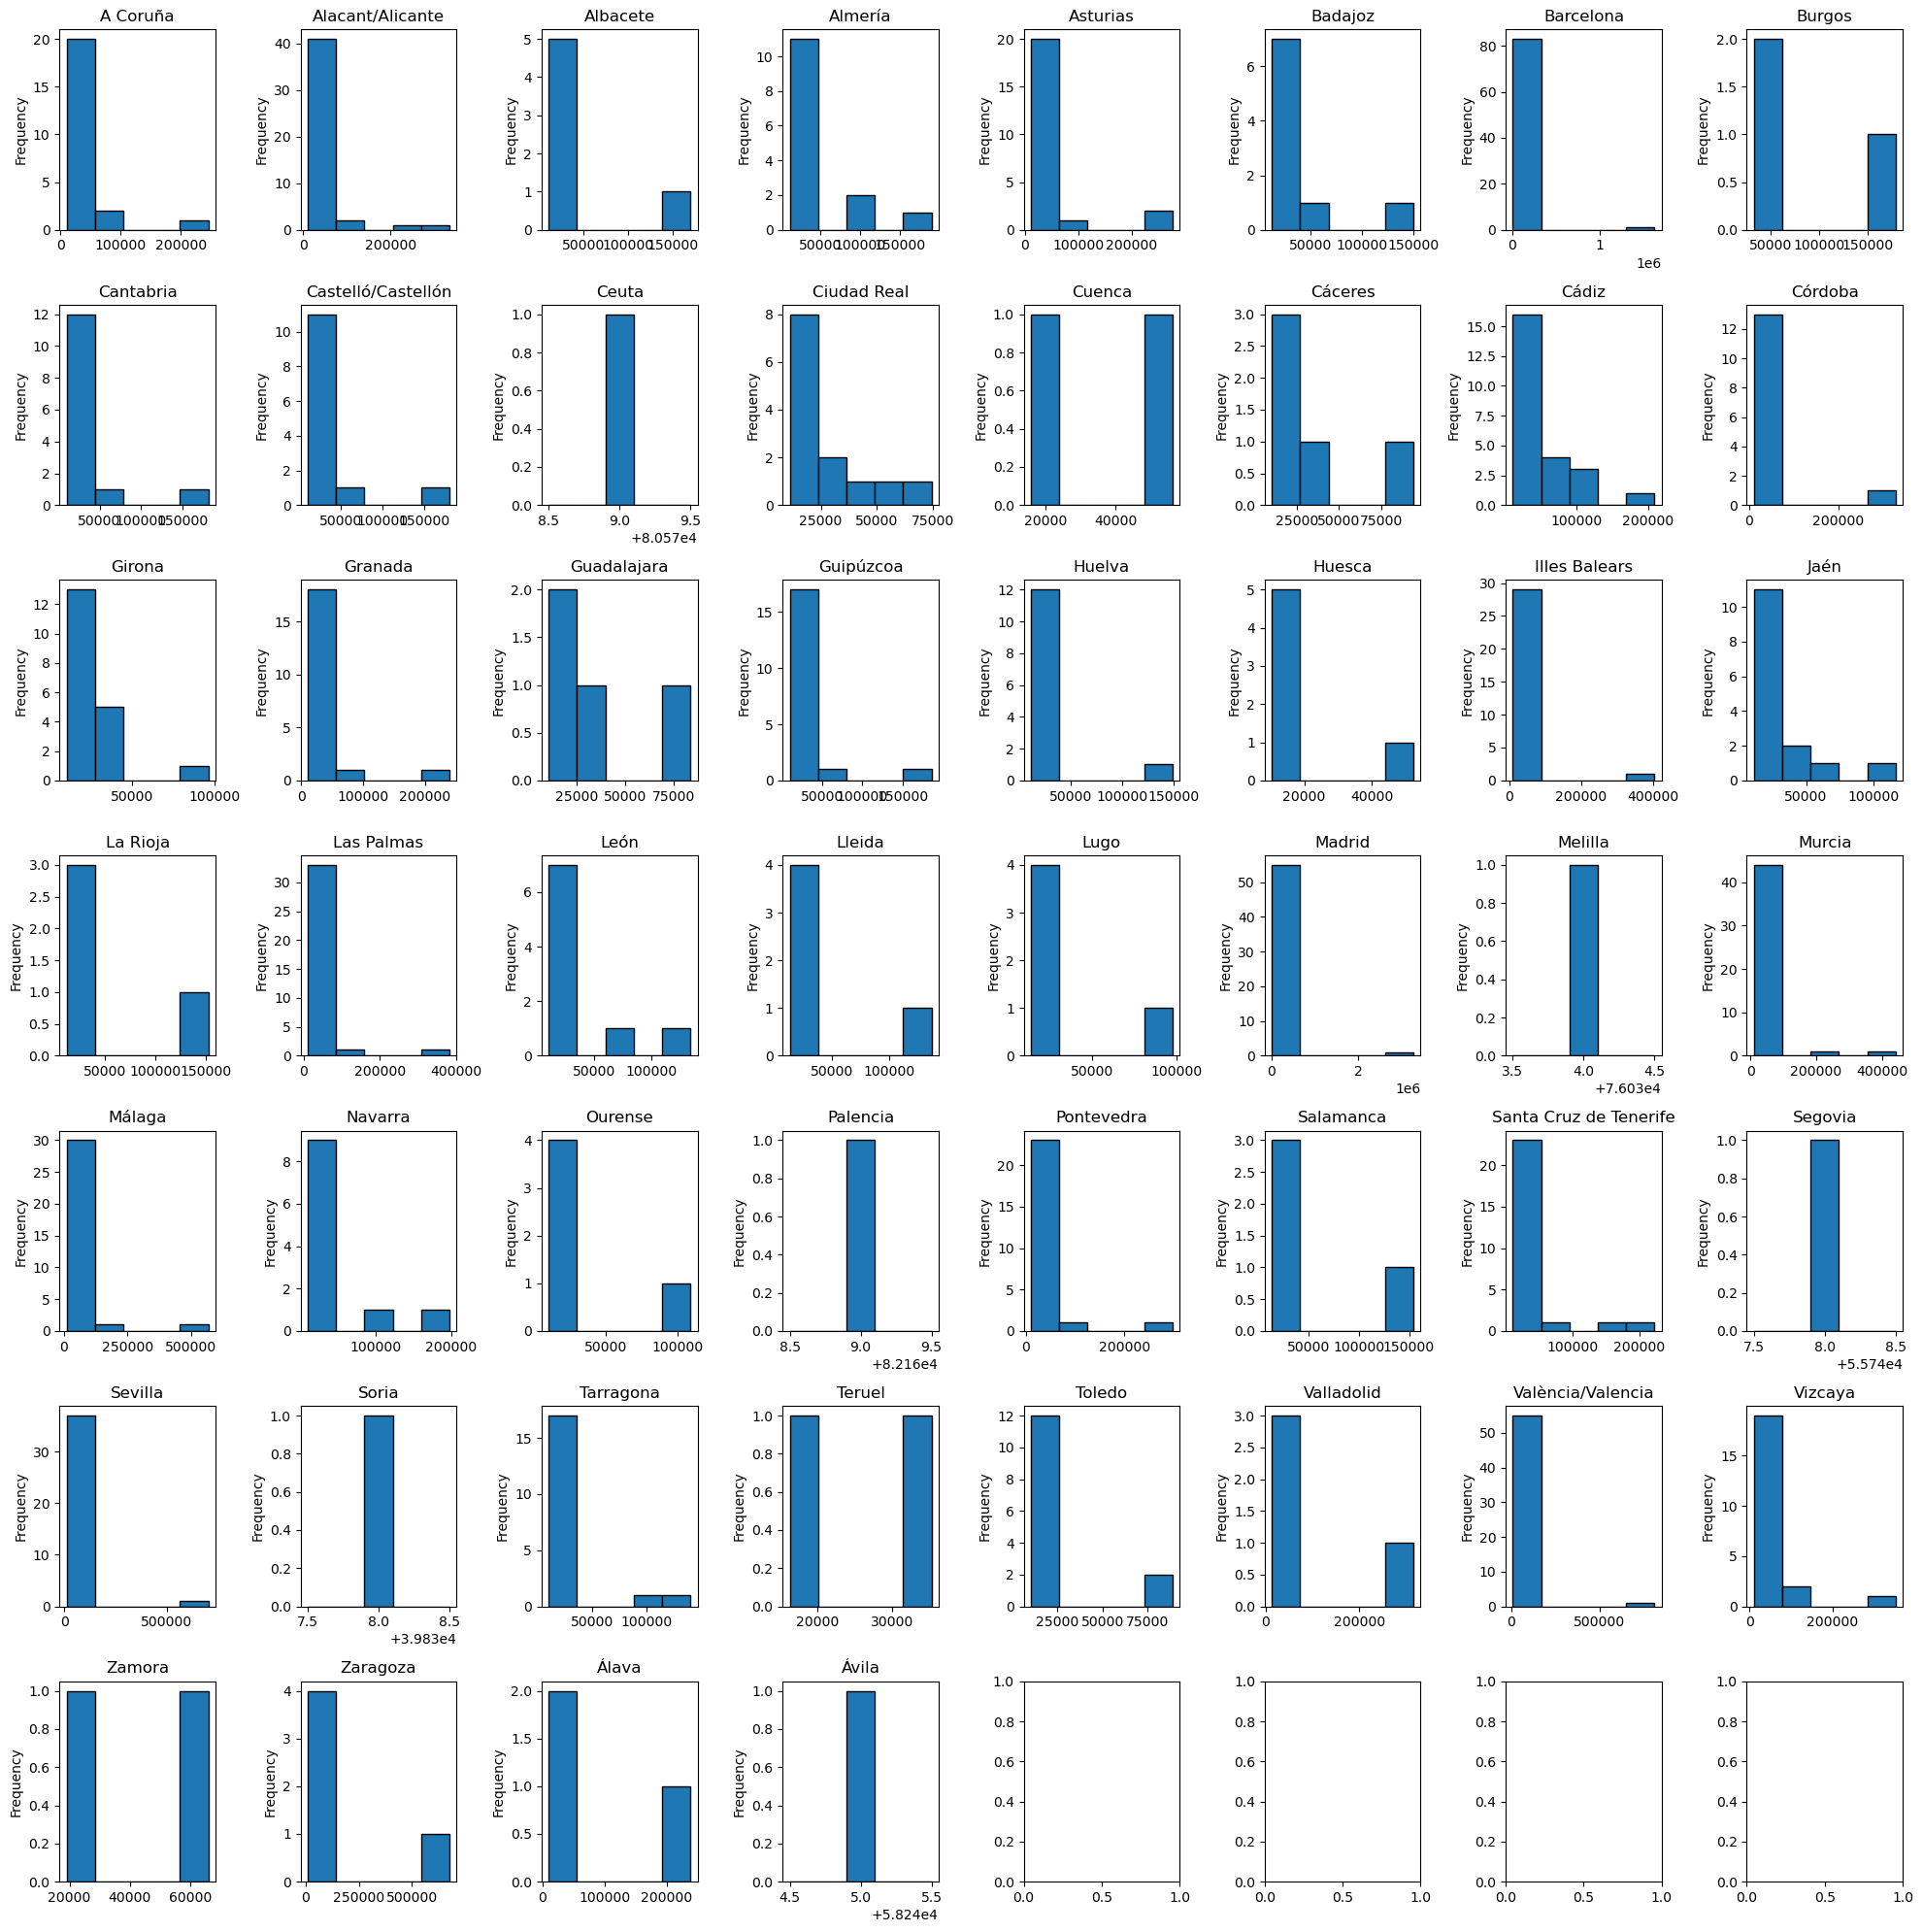

In [189]:
listProvinci = np.array(dataSet[['Provincia']].groupby('Provincia').sum().reset_index())

fig, axs = plt.subplots(7, 8, figsize=(20, 20))
cont1 = 0
cont2 = 0
for provincia in listProvinci:
    dataSetHisto = dataSet.loc[dataSet['Provincia'] == provincia[0]]
    dataSetHisto['Poblacion'].plot.hist(bins=5, edgecolor='black',ax=axs[cont2,cont1])
    axs[cont2,cont1].set_title(f"{provincia[0]}")
    cont1 += 1
    if cont1 == 8:
        cont2 += 1
        cont1 = 0
    
plt.tight_layout() 
plt.show()    



### 7.  Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [190]:
municiAlAar = dataSet.sample(n=50)
print("Promedio", round(municiAlAar['Poblacion'].mean(), 4))
print("Desviacion", round(np.std(municiAlAar['Poblacion']),4))

Promedio 42368.0
Desviacion 80196.5011


### 8.  Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero. 

In [191]:
dataSinMadrid = dataSet[dataSet['Municipio'] != 'Madrid']
Madrid = dataSet[dataSet['Municipio'] == 'Madrid']


lejano = 0 
cercano = 5000
nombreCer = ""
nombreLeja = ""
for municipio in dataSinMadrid.iterrows():
    distancia = float(np.sqrt(((municipio[1].X-Madrid.X)**2+(municipio[1].Y-Madrid.Y)**2)))
    if distancia > lejano:
        lejano = distancia
        nombreLeja = municipio[1].Municipio
    if distancia < cercano:
        cercano = distancia
        nombreCer = municipio[1].Municipio

print("El municipio mas cercano a Madrid es:",nombreCer, "a una distancia de", cercano)
print("El municipio mas lejano a Madrid es:",nombreLeja, "a una distancia de", lejano)


El municipio mas cercano a Madrid es: Pozuelo de Alarcón a una distancia de 0.08096987608788916
El municipio mas lejano a Madrid es: Los Llanos de Aridane a una distancia de 18.444253845781045
